# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнили студенты гр. 9383 Рыбников Роман и Сергиенкова Анастасия. Вариант №1

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения

$\bullet$ **Статистический ряд** - последовательность элементов выборки, расположенных в порядке их получения (наблюдения).

$\bullet$ **Ранжированный ряд** - последовательность элементов выборки, расположенных в порядке возрастания их значений. Номер элемента ранжированного ряда в последовательности называется **рангом**.

$\bullet$ **Вариационный ряд** - получается из ранжированного ряда в результате объединения одинаковых элементов. Элементы вариационного ряда называются вариантами.

$\bullet$ **Построение интервального ряда**. Если количество вариант $K$ достаточно велико, то необходимо разделять вариационный ряд на интервалы. В этом случае ряд называется интервальным. Количество интервалов $k$ зависит от объема выборки $N$ и может быть вычислено по формуле Стерджесса: 

$$\displaystyle k = 1 + 3.31 \lg{(N)}$$

Полученное значение округляется до целого. Рекомендуется выбирать нечетное число интервалов.

$\bullet$ **Эмпирической функцией распределения** называют функцию $F^*(x)$, определяющую для каждого значения $x$ относительную частоты события $X < x$. График представляет собой лестничный график, длина каждой ступеньки которого равна длине соответствующего интервала, а высота - отношению накопленной частоты до середины этого интервала к объему выборки.

## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


#### Пункт 2-3

Из генеральной совокупности была сформирована выборка объема $107$, что соотвествует полученному от преподавателя номеру.

Выборка состоит из данных наблюдений относительно объёмного веса $v\big(\dfrac{г}{см^3}\big)$ при влажности $10\%$ и модуля упругости $E\big(\dfrac{кг}{см^2}\big)$ при сжатии вдоль волокон древесины резонансной ели.

#### Пункт 4

Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды. Интервальный ряд представить в виде табл. 1. Результаты содержательно проинтерпретировать.

#### Импортирование необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import groupby

In [2]:
selection_size = 107

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#### Генеральная совокупность (таблица 1)

In [3]:
df_main = pd.read_csv('sample_main.csv', sep=';')

df_main

,nu,E
0,480,153.3
1,510,129.4
2,426,119.0
3,482,139.9
4,393,103.2
5,510,162.3
6,403,123.9
7,506,158.4
8,393,122.8
9,442,115.4


#### Исходная выборка (таблица 2)

In [4]:
df = pd.read_csv('sample.csv', sep=';').iloc[:, 0]

pd.DataFrame(df)

,nu
0,550
1,434
2,480
3,340
4,482
5,358
6,438
7,469
8,393
9,502


#### Ранжированный ряд (таблица 3)

In [5]:
ranked_row = df.sort_values()
pd.DataFrame(ranked_row)

,nu
28,331
3,340
98,345
79,351
5,358
58,362
25,369
62,371
40,372
15,377


Ранжированный ряд является упорядоченным по неубыванию. Исходя из этого можно легко увидеть минимальное и максимальное значение признака.

In [6]:
print(f'Наименьшее значение в выборке: x_min = {ranked_row.min()}\nНаибольше значение в выборке: x_max = {ranked_row.max()}')

Наименьшее значение в выборке: x_min = 331
Наибольше значение в выборке: x_max = 623


#### Вариационный ряд (таблица 4)

In [7]:
af = df.value_counts().sort_index()
rf = df.value_counts(normalize=True).sort_index()

af_ = pd.DataFrame({'nu': af.index, 'af': af.values})
rf_ = pd.DataFrame({'nu': rf.index, 'Relative frequency': rf.values})

variation_df = pd.DataFrame({'nu': af.index, 'Relative frequency': np.round(rf.values, 6), 'Frequency': af.values})
variation_df

,nu,Relative frequency,Frequency
0,331,0.009346,1
1,340,0.009346,1
2,345,0.009346,1
3,351,0.009346,1
4,358,0.009346,1
5,362,0.009346,1
6,369,0.009346,1
7,371,0.009346,1
8,372,0.009346,1
9,377,0.009346,1


Анализируя полученный вариационный ряд, можно сделать вывод, что элементы достаточно уникальны, исходя из частоты появления значений (частота 1)

#### Интервальный ряд (таблица 5)

Для вычисления интервального ряда использовалась формула Стерджесса, определяющая число интервалов по объёму выборки

$$\displaystyle k = 1 + 3.222\cdot lg(N)$$

In [8]:
midpoints = []
abs_freq = []
relative_freq = []
accum_abs_freq = []
accum_relative_freq = []

def interval_freq(ks, borders, midpoints,abs_freq, relative_freq, accum_abs_freq, accum_relative_freq):
    for i, border in enumerate(borders):
        if i != len(borders)-1:
            midpoints.append(round((border[0]+border[1])/2))
        else:
            midpoints.append(round((border[0]+border[1])/2))
            
        abs_freq.append(len(ks[i]))
        relative_freq.append(len(ks[i])/len(ranked_row))
        if len(accum_abs_freq) == 0:
            accum_abs_freq.append(len(ks[i]))
        else:
            accum_abs_freq.append(len(ks[i]) + accum_abs_freq[-1])
        
        if len(accum_relative_freq) == 0:
            accum_relative_freq.append(len(ks[i])/len(ranked_row))
        else:
            accum_relative_freq.append(len(ks[i])/len(ranked_row)+accum_relative_freq[-1])
                        
    
    return midpoints, abs_freq, relative_freq, accum_abs_freq, accum_relative_freq
        

k = int(1 + 3.31 * np.log10(selection_size))
max_, min_ = max(ranked_row), min(ranked_row)
range_ = max_ - min_
h = int(range_ / k)

isInK = lambda x: min(int((abs(x) - min_) / range_ * k), k-1)
borders = [[min_ + range_/k*i, min_ + range_/k*(i+1)] for i in range(k)]
borders_ = []
borders_temp = []
borders__ = []
ks = [[] for i in range(k)]

for i, elem in enumerate(borders):
    borders_.append([])
    for j, el in enumerate(elem):
        borders_[i].append(round(el,0))
        
for i, elem in enumerate(borders_):
    for j, el in enumerate(elem):
        borders_temp.append(el)
     

    
borders__ = [el for el, _ in groupby(borders_temp)]

for val in df:
    ks[isInK(val)].append(val)
    

In [9]:
midpoints, abs_freq, relative_freq, accum_abs_freq, accum_relative_freq = interval_freq(ks, borders, midpoints, abs_freq, relative_freq, accum_abs_freq, accum_relative_freq)

interval_data = pd.DataFrame({'$[x_i, x_{i+1})$': borders_,
             '$\tilde x_i$': midpoints,
             '$n_i$':abs_freq,
             '$p_i^*$':relative_freq,
             '$n_i^{\sum}$':accum_abs_freq,
             '$p_i^{\sum}$':accum_relative_freq})

interval_data

,"$[x_i, x_{i+1})$",$\tilde x_i$,$n_i$,$p_i^*$,$n_i^{\sum}$,$p_i^{\sum}$
0,"[331.0, 373.0]",352,9,0.084112,9,0.084112
1,"[373.0, 414.0]",394,22,0.205607,31,0.289720
2,"[414.0, 456.0]",435,29,0.271028,60,0.560748
3,"[456.0, 498.0]",477,23,0.214953,83,0.775701
4,"[498.0, 540.0]",519,13,0.121495,96,0.897196
5,"[540.0, 581.0]",560,7,0.065421,103,0.962617
6,"[581.0, 623.0]",602,4,0.037383,107,1.000000


In [10]:
print(f'Сумма абсолютных частот равна: {interval_data["$n_i$"].sum()}')
print(f'Сумма относительных частот равна: {interval_data["$p_i^*$"].sum()}')

Сумма абсолютных частот равна: 107
Сумма относительных частот равна: 1.0


Из результатов видно, что сумма абсолютных частот равна $107$, что равно объёму выборки. Сумма относительных частот равна $1$

In [11]:
abs_freq_ = []
for elem in abs_freq:
    abs_freq_.append(elem/h) 

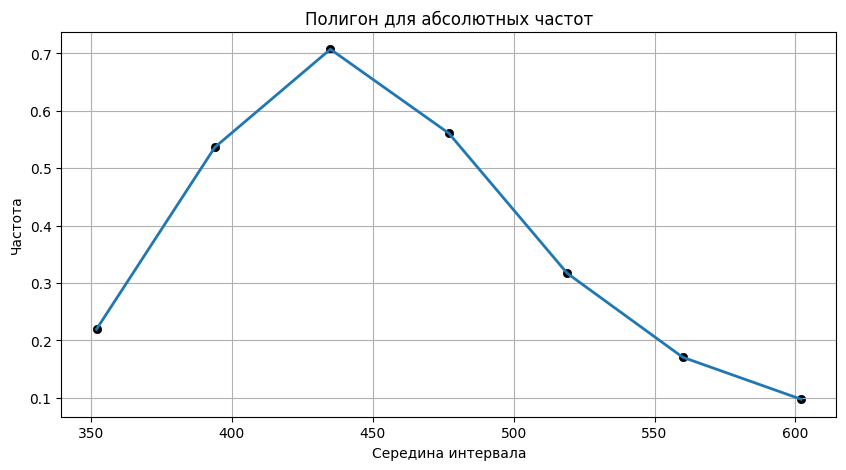

In [12]:
plt.figure(figsize=(10,5))
plt.plot(midpoints, abs_freq_, linewidth=2)
plt.scatter(midpoints,abs_freq_, linewidth=0.5, color='black')

plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.title('Полигон для абсолютных частот')
plt.grid()

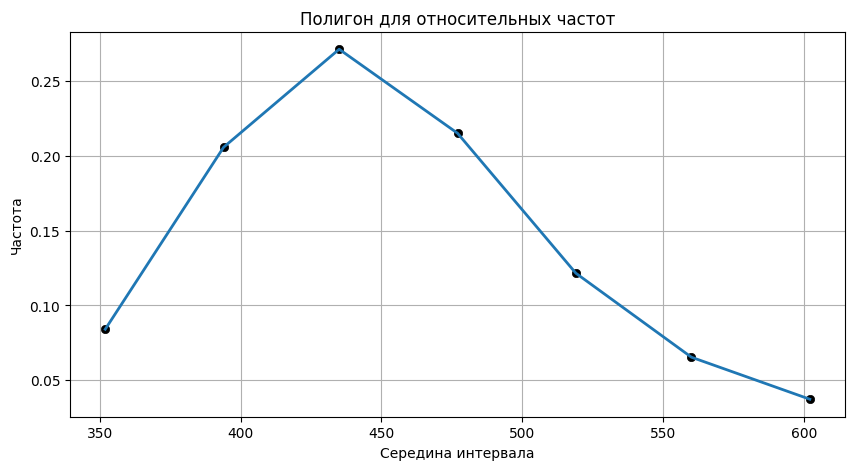

In [13]:
plt.figure(figsize=(10,5))
plt.plot(midpoints, relative_freq, linewidth=2,)
plt.scatter(midpoints,relative_freq, linewidth=0.5, color='black')

plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.title('Полигон для относительных частот')
plt.grid()

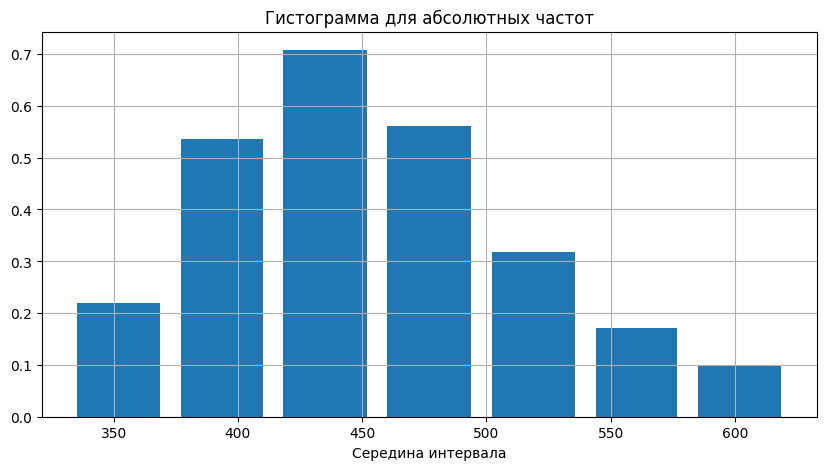

In [16]:
plt.figure(figsize=(10,5))

plt.hist(midpoints, borders__, weights=abs_freq_, rwidth=0.8)
plt.xlabel('Середина интервала')
plt.title('Гистограмма для абсолютных частот')
plt.grid()

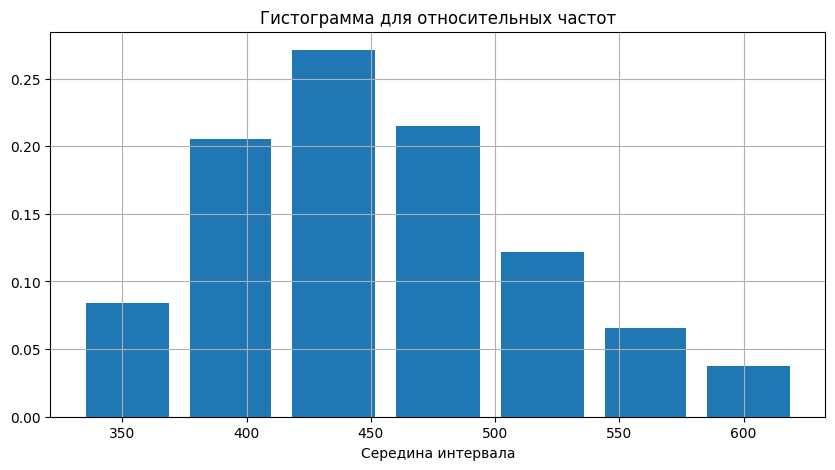

In [17]:
plt.figure(figsize=(10,5))
plt.hist(midpoints, borders__, weights=relative_freq, rwidth=0.8)
plt.xlabel('Середина интервала')
plt.title('Гистограмма для относительных частот')
plt.grid()

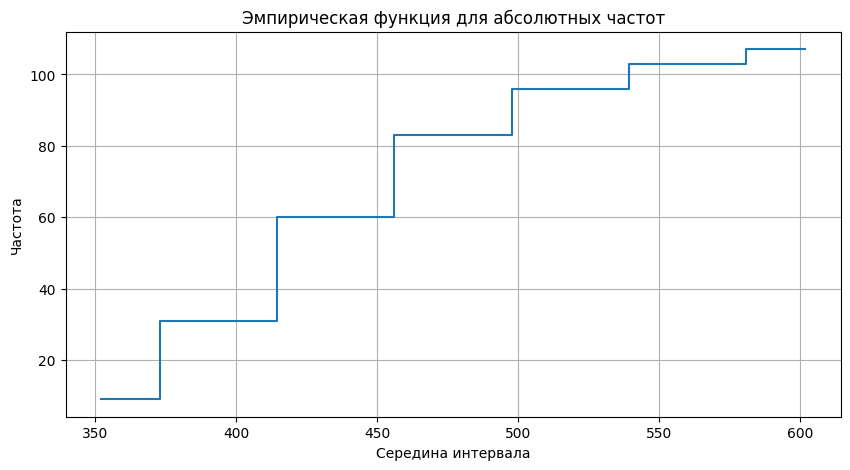

In [20]:
plt.figure(figsize=(10,5))
plt.step(x=midpoints, y=accum_abs_freq, where='mid')

plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.title('Эмпирическая функция для абсолютных частот')
plt.grid()

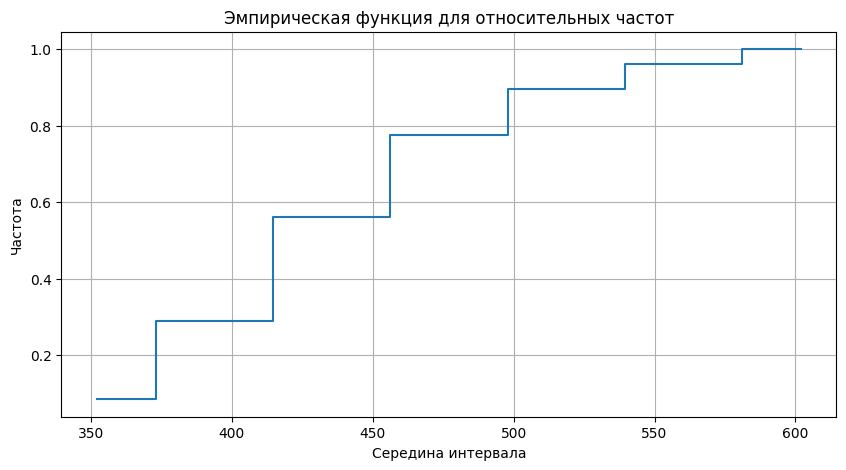

In [21]:
plt.figure(figsize=(10,5))
plt.step(x=midpoints, y=accum_relative_freq, where='mid')

plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.title('Эмпирическая функция для относительных частот')
plt.grid()

## Выводы

В ходе выполнения лабораторной работы была сформирована выборка объёмом $107$ из генеральной совокупности.

На основе выборки были построены ранжированный, вариационный и интервальный ряды. 

С помощью интервального ряда были построены: полигоны, гистограммы и эмпирическая функция распределения для абсолютных и относительных частот.

$\bullet$ В ранжированном ряду был произведен поиск максимального и минимального значения выборки: $\displaystyle x_{min} = 331$, $\displaystyle x_{max} = 623$ 

$\bullet$ В вариационном ряду были найдены наиболее частотные элементы.

$\bullet$ Для абсолютных частот были построены и отображены графически полигон, гистограмма и эмпирическая функция. 

На основе гистограмм и полигонов можно сделать вывод, что их форма не зависит от вида частот (абсолютная или относительная). Так же их форма говорит о том, что выборка, которая была получена из генеральной совокупности имеет нормальное распределение.